In [40]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from sympy import diff,solve,Eq,exp

235U

In [41]:
with open('1985Schreckenbach_N_beta_E_235U.csv', newline='') as N_beta_E_235U:
    N_beta_E_235U = np.array(list(csv.reader(N_beta_E_235U)),dtype=float)
E, N_beta_235U = N_beta_E_235U[:,0], N_beta_E_235U[:,1]

In [42]:
with open('1985Schreckenbach_N_nu_E_235U.csv', newline='') as N_nu_E_235U:
    N_nu_E_235U = np.array(list(csv.reader(N_nu_E_235U)),dtype=float)
err = (N_nu_E_235U[:,3]*N_nu_E_235U[:,1])/100

In [43]:
with open('1985Schreckenbach_k_E_235U.csv', newline='') as k_E_235U:
    k_E_235U = np.array(list(csv.reader(k_E_235U)),dtype=float)
k_235U = interpolate.interp1d(k_E_235U[:,0], k_E_235U[:,1])

In [44]:
with open('daya-bay.csv', newline='') as dayabay:
    dayabay = np.array(list(csv.reader(dayabay)),dtype=float)
E_dayabay, N_nu_dayabay = dayabay[:,0], ((dayabay[:,1]*12)/5208)*4

In [ ]:
((N_nu_dayabay-N_nu_E_235U[:,1])/N_nu_E_235U[:,1])

Find Nu Spectra From Beta Spectra

In [8]:
i = 0
N_nu_235U = []

while i < len(E)-5:
    N_nu_235U.append(k_235U(E[i] + 0.511) * N_beta_235U[i])
    i += 1

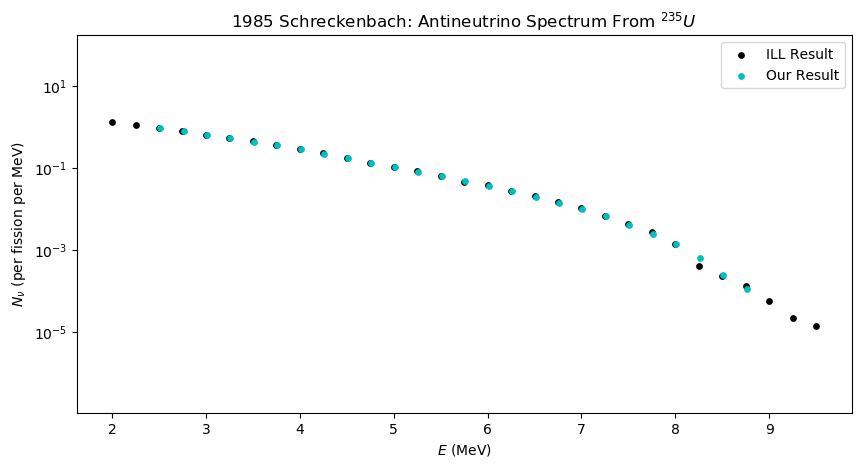

In [39]:
plt.figure(figsize=(10, 5),dpi=100)
plt.yscale("log")

plt.scatter(E, (N_nu_E_235U[:,1]), label="ILL Result", c='black', s=15)
plt.scatter(E[:26]+0.511, (N_nu_235U[:26]), label="Our Result", c='c', s=15)


plt.xlabel(r'$E$'' (MeV)')
plt.ylabel(r'$N_\nu$'' (per fission per MeV)')
plt.title('1985 Schreckenbach: Antineutrino Spectrum From ''$^{235}U $')
plt.legend()

plt.show()

Fit On The Nu Spectra (By The ILL Results)

Polynomial Of Order 2

In [34]:
from sympy.abc import a,b,c
chi_sq = []

for i in range (len(N_nu_E_235U)):
    chi_sq.append(((np.log(N_nu_E_235U[:,1][i]) - (a + b*(E[i]) + c*(E[i])**2))/np.log(err[i]))**2)
    i += 1
    
chi_sq = sum(chi_sq)

eq1 = Eq(diff(chi_sq,a))
eq2 = Eq(diff(chi_sq,b))
eq3 = Eq(diff(chi_sq,c))
sol = solve((eq1,eq2,eq3), (a, b, c))
a_0, a_1, a_2 = np.float(sol[a]), np.float(sol[b]), np.float(sol[c])

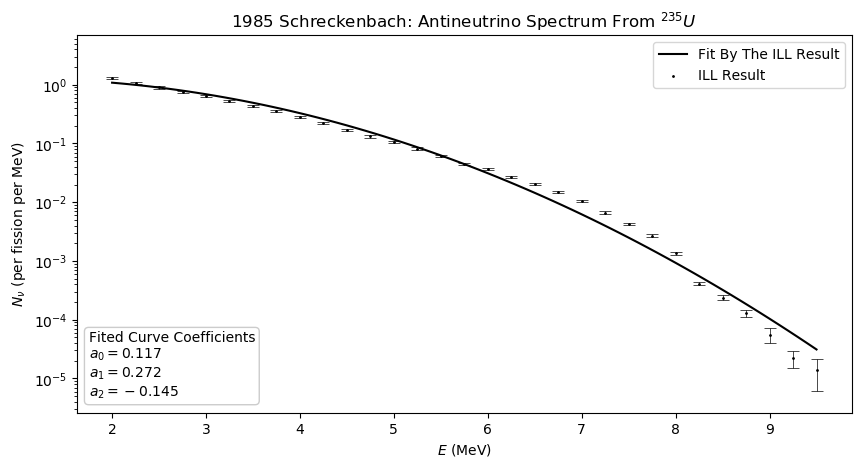

In [38]:
plt.figure(figsize=(10, 5),dpi=100)
plt.yscale("log")

plt.scatter(E, (N_nu_E_235U[:,1]), label="ILL Result", c='black', s=1)
plt.errorbar(E, (N_nu_E_235U[:,1]), yerr=(err), linestyle="None", c='black',capsize=4.5,capthick=0.5,elinewidth=0.5)

ee = np.arange(E[0], E[30]+0.1, 0.1)
plt.plot(ee,np.exp(a_0+a_1*ee+a_2*ee**2), label="Fit By The ILL Result", c='black')

textstr = '\n'.join((
    'Fited Curve Coefficients',
    r'$a_0=%.3f$' % (a_0, ),
    r'$a_1=%.3f$' % (a_1, ),
    r'$a_2=%.3f$' % (a_2, )))
plt.text(1.75, 0.000005, textstr, ha='left', bbox=dict(boxstyle="round",ec=(0.8, 0.8, 0.8),fc=(1., 1, 1),))

plt.xlabel(r'$E$'' (MeV)')
plt.ylabel(r'$N_\nu$'' (per fission per MeV)')
plt.title('1985 Schreckenbach: Antineutrino Spectrum From ''$^{235}U $')
plt.legend()

plt.show()

Polynomial Of Order 5

In [9]:
from sympy.abc import a,b,c,d,e,f
chi_sq = []

for i in range (len(N_nu_E_235U)):
    chi_sq.append(((np.log(N_nu_E_235U[:,1][i]) - (a + b*(E[i]) + c*(E[i])**2 + d*(E[i])**3 + e*(E[i])**4+f*(E[i])**5))/np.log(err[i]))**2)
    i += 1
    
chi_sq = sum(chi_sq)

eq1 = Eq(diff(chi_sq,a))
eq2 = Eq(diff(chi_sq,b))
eq3 = Eq(diff(chi_sq,c))
eq4 = Eq(diff(chi_sq,d))
eq5 = Eq(diff(chi_sq,e))
eq6 = Eq(diff(chi_sq,f))
sol = solve((eq1,eq2,eq3,eq4,eq5,eq6), (a, b, c, d, e, f))
a_0, a_1, a_2, a_3, a_4,a_5 = np.float(sol[a]), np.float(sol[b]), np.float(sol[c]), np.float(sol[d]), np.float(sol[e]), np.float(sol[f])

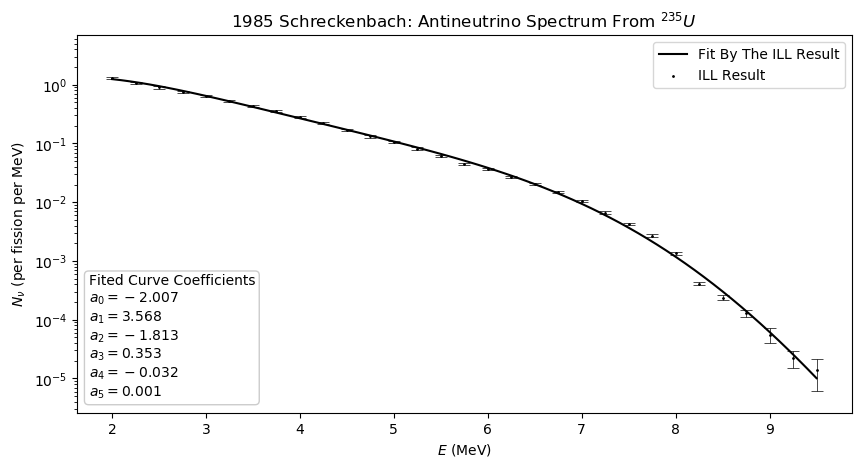

In [10]:
plt.figure(figsize=(10, 5),dpi=100)
plt.yscale("log")

plt.scatter(E, (N_nu_E_235U[:,1]), label="ILL Result", c='black', s=1)
plt.errorbar(E, (N_nu_E_235U[:,1]), yerr=(err), linestyle="None", c='black',capsize=4.5,capthick=0.5,elinewidth=0.5)

ee = np.arange(E[0], E[30]+0.1, 0.1)
plt.plot(ee,np.exp(a_0+a_1*ee+a_2*ee**2+a_3*ee**3+a_4*ee**4+a_5*ee**5), label="Fit By The ILL Result", c='black')

textstr = '\n'.join((
    'Fited Curve Coefficients',
    r'$a_0=%.3f$' % (a_0, ),
    r'$a_1=%.3f$' % (a_1, ),
    r'$a_2=%.3f$' % (a_2, ),
    r'$a_3=%.3f$' % (a_3, ),
    r'$a_4=%.3f$' % (a_4, ),
    r'$a_5=%.3f$' % (a_5, )))
plt.text(1.75, 0.000005, textstr, ha='left', bbox=dict(boxstyle="round",ec=(0.8, 0.8, 0.8),fc=(1., 1, 1),))

plt.xlabel(r'$E$'' (MeV)')
plt.ylabel(r'$N_\nu$'' (per fission per MeV)')
plt.title('1985 Schreckenbach: Antineutrino Spectrum From ''$^{235}U $')
plt.legend()

plt.show()